# RHEED Metrics with Details

In [57]:
%load_ext autoreload
%autoreload 2
import os
import re
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append("../../src/")
from m3_learning.util.file_IO import download_and_unzip
from m3_learning.viz.style import set_style
from m3_learning.viz.printing import printer
from m3_learning.viz.layout import layout_fig, labelfigs
from m3_learning.RHEED.Dataset import RHEED_spot_Dataset, RHEED_parameter_dataset
from m3_learning.RHEED.Viz import Viz
from m3_learning.RHEED.Fit import RHEED_image_processer, Gaussian, NormalizeData

# from m3_learning.viz.style import set_style
# from m3_learning.viz.printing import printer
# from m3_learning.RHEED.Dataset import RHEED_spot_Dataset, RHEED_parameter_dataset

printing_image = printer(basepath = '../Figures/1.Fit_RHEED_spot/')
printing_plot = printer(basepath = '../Figures/1.Fit_RHEED_spot/', fileformats=['png'])

set_style("printing")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
printing set for seaborn


## 1. Download datasets from Zenodo

In [2]:
# # Download the data file from Zenodo
# download=False
# if download:
#     # full size version
#     urls = ['https://zenodo.org/record/7950043/files/STO_STO_test6_06292022-standard.h5?download=1',
#             'https://zenodo.org/record/7950043/files/STO_STO_test7_06292022-standard.h5?download=1',
#             'https://zenodo.org/record/7950043/files/STO_STO_test9_07142022-standard.h5?download=1',
#             'https://zenodo.org/record/7950043/files/test6_gaussian_fit_parameters_all-04232023.h5?download=1',
#             'https://zenodo.org/record/7950043/files/test7_gaussian_fit_parameters_all-04232023.h5?download=1',
#             'https://zenodo.org/record/7950043/files/test9_gaussian_fit_parameters_all-04232023.h5?download=1']

#     # compressed version
#     urls_compressed = ['https://zenodo.org/record/7948591/files/STO_STO_test6_06292022-standard-compressed.h5?download=1',
#                         'https://zenodo.org/record/7948591/files/STO_STO_test7_06292022-standard-compressed.h5?download=1',
#                         'https://zenodo.org/record/7948591/files/STO_STO_test9_07142022-standard-compressed.h5?download=1',
#                         'https://zenodo.org/record/7948591/files/test6_gaussian_fit_parameters_all-04232023-compressed.h5?download=1',
#                         'https://zenodo.org/record/7948591/files/test7_gaussian_fit_parameters_all-04232023-compressed.h5?download=1',
#                         'https://zenodo.org/record/7948591/files/test9_gaussian_fit_parameters_all-04232023-compressed.h5?download=1']   

#     for url in urls:
#         # Specify the filename and the path to save the file
#         filename = re.split(r'\?', os.path.basename(url))[0]
#         save_path = './../2023_RHEED_PLD_SrTiO3/Datasets/'

#         # download the file
#         download_and_unzip(filename, url, save_path)

## 2. Fitting the RHEED Dataset

### 2.1 Sample treated_213nm

#### 2.1.1 Loading the Dataset

In [3]:
path = 'D:/STO_STO-Data/RHEED/STO_STO_Berkeley/STO_STO_test6_06292022-standard.h5'
D1_spot = RHEED_spot_Dataset(path, sample_name='treated_213nm')
D1_spot.data_info

Growth: background_with_heater, Size of data: f(2251, 300, 300)
Growth: background_without_heater, Size of data: f(2942, 300, 300)
Growth: growth_1, Size of data: f(13189, 300, 300)
Growth: growth_10, Size of data: f(12336, 300, 300)
Growth: growth_11, Size of data: f(12799, 300, 300)
Growth: growth_12, Size of data: f(12563, 300, 300)
Growth: growth_2, Size of data: f(12858, 300, 300)
Growth: growth_3, Size of data: f(11392, 300, 300)
Growth: growth_4, Size of data: f(13067, 300, 300)
Growth: growth_5, Size of data: f(12619, 300, 300)
Growth: growth_6, Size of data: f(12610, 300, 300)
Growth: growth_7, Size of data: f(12431, 300, 300)
Growth: growth_8, Size of data: f(12553, 300, 300)
Growth: growth_9, Size of data: f(12568, 300, 300)


#### 2.1.2 Locate the diffraction spots

Fig. a: RHEED spot image for growth_2 at index 0.
../Figures/1.Fit_RHEED_spot/RHEED_treated_213nm_growth_2_0.png
../Figures/1.Fit_RHEED_spot/RHEED_treated_213nm_growth_2_0.svg


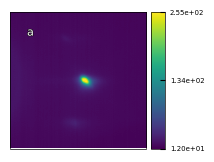

In [4]:
D1_spot.viz_RHEED_spot(growth='growth_2', index=0, figsize=(2,4), filename=True, printing=printing_image)

#### 2.1.3 Visualize an example

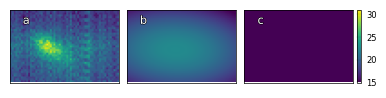

Fig. a: RHEED spot image, b: reconstructed RHEED spot image, c: difference between original and reconstructed image for growth_1 at index 0.
The Gaussian fitted parameters are: img_sum=48241.00, img_max=31.00, img_mean=20.10,
img_rec_sum=48030.96, img_rec_max=22.65, img_rec_mean=20.01,
height=22.65, x=22.31, y=26.81, width_x=30.30, width_y_max=57.73.


In [5]:
crop_dict = {'spot_1': {'y_start':40, 'y_end':80, 'x_start':100, 'x_end':160}, 
             'spot_2': {'y_start':137, 'y_end':166, 'x_start':147, 'x_end':195}, 
             'spot_3': {'y_start':230, 'y_end':262, 'x_start':115, 'x_end':180}}

fit_function = Gaussian().recreate_gaussian
processor = RHEED_image_processer(D1_spot, crop_dict, fit_function)
img, img_rec, parameters = processor.visualize(growth='growth_1', spot='spot_1', frame=0)

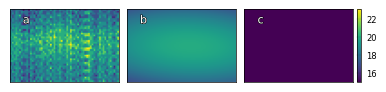

Fig. a: RHEED spot image, b: reconstructed RHEED spot image, c: difference between original and reconstructed image for growth_12 at index 0.
The Gaussian fitted parameters are: img_sum=45531.00, img_max=23.00, img_mean=18.97,
img_rec_sum=45440.48, img_rec_max=19.94, img_rec_mean=18.93,
height=19.94, x=20.29, y=34.92, width_x=42.13, width_y_max=114.21.


In [6]:
img, img_rec, parameters = processor.visualize(growth='growth_12', spot='spot_1', frame=0)

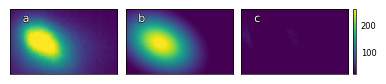

Fig. a: RHEED spot image, b: reconstructed RHEED spot image, c: difference between original and reconstructed image for growth_1 at index 0.
The Gaussian fitted parameters are: img_sum=120241.00, img_max=255.00, img_mean=86.38,
img_rec_sum=105894.35, img_rec_max=260.62, img_rec_mean=76.07,
height=260.95, x=17.81, y=19.75, width_x=7.32, width_y_max=10.65.


In [7]:
img, img_rec, parameters = processor.visualize(growth='growth_1', spot='spot_2', frame=0)

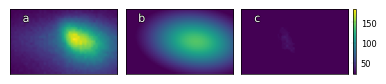

Fig. a: RHEED spot image, b: reconstructed RHEED spot image, c: difference between original and reconstructed image for growth_12 at index 0.
The Gaussian fitted parameters are: img_sum=87657.00, img_max=183.00, img_mean=62.97,
img_rec_sum=82424.84, img_rec_max=139.73, img_rec_mean=59.21,
height=139.78, x=14.58, y=31.86, width_x=8.56, width_y_max=14.55.


In [8]:
img, img_rec, parameters = processor.visualize(growth='growth_12', spot='spot_2', frame=0)

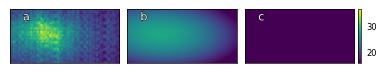

Fig. a: RHEED spot image, b: reconstructed RHEED spot image, c: difference between original and reconstructed image for growth_1 at index 0.
The Gaussian fitted parameters are: img_sum=47740.00, img_max=36.00, img_mean=22.95,
img_rec_sum=47200.00, img_rec_max=27.82, img_rec_mean=22.69,
height=27.83, x=14.75, y=19.52, width_x=21.56, width_y_max=47.67.


In [9]:
img, img_rec, parameters = processor.visualize(growth='growth_1', spot='spot_3', frame=0)

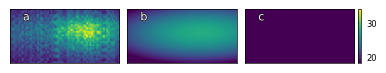

Fig. a: RHEED spot image, b: reconstructed RHEED spot image, c: difference between original and reconstructed image for growth_12 at index 0.
The Gaussian fitted parameters are: img_sum=49480.00, img_max=34.00, img_mean=23.79,
img_rec_sum=49086.48, img_rec_max=27.89, img_rec_mean=23.60,
height=27.90, x=13.87, y=44.06, width_x=20.56, width_y_max=62.86.


In [10]:
img, img_rec, parameters = processor.visualize(growth='growth_12', spot='spot_3', frame=0)

#### 2.1.4 Exam the dataset

In [11]:
path = 'D:/STO_STO-Data/RHEED/STO_STO_Berkeley/test6_gaussian_fit_parameters_all-04232023.h5'
D1_para = RHEED_parameter_dataset(path, camera_freq=500, sample_name='treated_213nm')
# D1_para.data_info   

../Figures/1.Fit_RHEED_spot/RHEED_treated_213nm_growth_1_spot_2_0_img,img_rec,differerce.png
../Figures/1.Fit_RHEED_spot/RHEED_treated_213nm_growth_1_spot_2_0_img,img_rec,differerce.svg


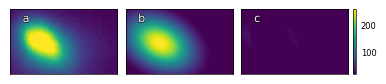

Fig. a: RHEED spot image, b: reconstructed RHEED spot image, c: difference between original and reconstructed image for growth_1 at index 0.
img_sum=120241.00, img_max=255.00, img_mean=86.38
img_rec_sum=105894.35, img_rec_max=260.62, img_rec_mean=76.07
height=260.95, x=17.81, y=19.75, width_x=7.32, width_y_max=10.65


In [12]:
D1_para.viz_RHEED_parameter(growth='growth_1', spot='spot_2', index=0, filename = True, printing=printing_image)

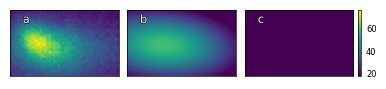

Fig. a: RHEED spot image, b: reconstructed RHEED spot image, c: difference between original and reconstructed image for growth_1 at index 5000.
img_sum=53002.00, img_max=77.00, img_mean=38.08
img_rec_sum=51472.73, img_rec_max=59.34, img_rec_mean=36.98
height=59.35, x=15.42, y=16.09, width_x=11.24, width_y_max=23.73


In [13]:
D1_para.viz_RHEED_parameter(growth='growth_1', spot='spot_2', index=5000)

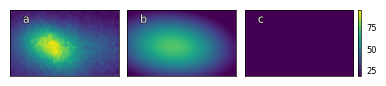

Fig. a: RHEED spot image, b: reconstructed RHEED spot image, c: difference between original and reconstructed image for growth_1 at index 10000.
img_sum=60688.00, img_max=96.00, img_mean=43.60
img_rec_sum=58616.58, img_rec_max=75.27, img_rec_mean=42.11
height=75.37, x=16.06, y=20.26, width_x=10.33, width_y_max=18.64


In [14]:
D1_para.viz_RHEED_parameter(growth='growth_1', spot='spot_2', index=10000)

../../src\m3_learning\RHEED\Dataset.py:508: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['' for tick in ax.get_xticks()])


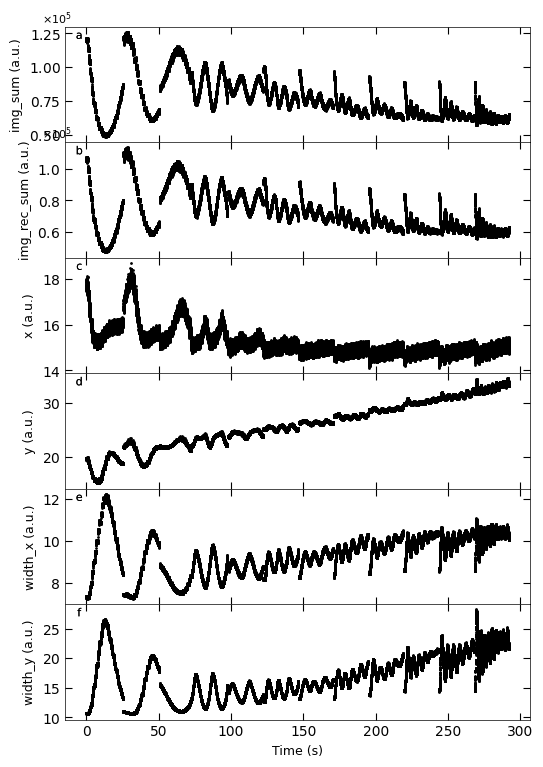

Gaussian fitted parameters in time: Fig. a: maximum intensity of original cropped RHEED spot, b: maximum intensity of resonstructed cropped RHEED spot, c: spot center in spot x coordinate, d: spot center in y coordinate, e: spot width in x coordinate, f: spot width in y coordinate.


In [15]:
growth_list = ['growth_1', 'growth_2', 'growth_3', 'growth_4', 'growth_5', 'growth_6', 
               'growth_7', 'growth_8', 'growth_9', 'growth_10', 'growth_11', 'growth_12']
D1_para.viz_RHEED_parameter_trend(growth_list, spot='spot_2', metric_list=['img_sum', 'img_rec_sum', 'x', 'y', 'width_x', 'width_y'], 
                                  head_tail=(100,500), interval=200)

../Figures/1.Fit_RHEED_spot/RHEED_treated_213nm_spot_2_metrics.png


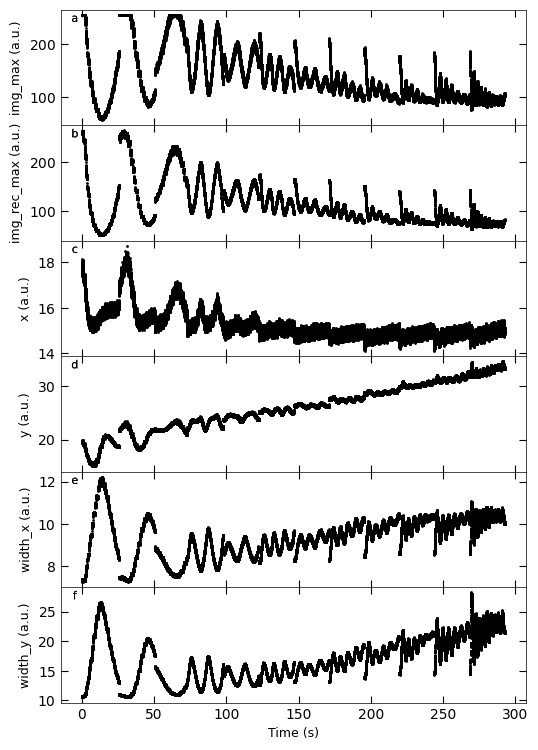

Gaussian fitted parameters in time: Fig. a: maximum intensity of original cropped RHEED spot, b: maximum intensity of resonstructed cropped RHEED spot, c: spot center in spot x coordinate, d: spot center in y coordinate, e: spot width in x coordinate, f: spot width in y coordinate.


In [16]:
growth_list = ['growth_1', 'growth_2', 'growth_3', 'growth_4', 'growth_5', 'growth_6', 
               'growth_7', 'growth_8', 'growth_9', 'growth_10', 'growth_11', 'growth_12']
D1_para.viz_RHEED_parameter_trend(growth_list, spot='spot_2', head_tail=(100,300), filename=True, printing=printing_plot)

### 2.2 Sample treated_81nm

#### 2.2.1 Loading the Dataset

In [17]:
path = 'D:/STO_STO-Data/RHEED/STO_STO_Berkeley/STO_STO_test7_06292022-standard.h5'
D2_spot = RHEED_spot_Dataset(path, sample_name='treated_81nm')
D2_spot.data_info

Growth: background_with_heater, Size of data: f(2651, 300, 600)
Growth: background_without_heater, Size of data: f(2652, 300, 600)
Growth: growth_1, Size of data: f(8603, 300, 600)
Growth: growth_10, Size of data: f(9439, 300, 600)
Growth: growth_11, Size of data: f(12155, 300, 600)
Growth: growth_12, Size of data: f(10736, 300, 600)
Growth: growth_2, Size of data: f(10612, 300, 600)
Growth: growth_3, Size of data: f(11648, 300, 600)
Growth: growth_4, Size of data: f(12152, 300, 600)
Growth: growth_5, Size of data: f(12317, 300, 600)
Growth: growth_6, Size of data: f(12453, 300, 600)
Growth: growth_7, Size of data: f(9482, 300, 600)
Growth: growth_8, Size of data: f(9490, 300, 600)
Growth: growth_9, Size of data: f(9704, 300, 600)


#### 2.2.2 Locate the diffraction spots

Fig. a: RHEED spot image for growth_2 at index 10.
../Figures/1.Fit_RHEED_spot/RHEED_treated_81nm_growth_2_10.png
../Figures/1.Fit_RHEED_spot/RHEED_treated_81nm_growth_2_10.svg


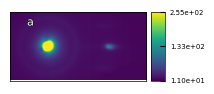

In [18]:
D2_spot.viz_RHEED_spot(growth='growth_2', index=10, figsize=(2,3), filename=True, printing=printing_image)

#### 2.2.3 Visualize an example

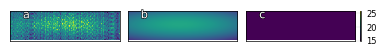

Fig. a: RHEED spot image, b: reconstructed RHEED spot image, c: difference between original and reconstructed image for growth_1 at index 1000.
The Gaussian fitted parameters are: img_sum=65540.00, img_max=26.00, img_mean=19.86,
img_rec_sum=65251.70, img_rec_max=21.53, img_rec_mean=19.77,
height=21.53, x=14.19, y=51.74, width_x=27.23, width_y_max=127.01.


In [19]:
crop_dict = {'spot_1': {'y_start':50, 'y_end':80, 'x_start':340, 'x_end':450},
             'spot_2': {'y_start':143, 'y_end':165, 'x_start':415, 'x_end':455},
             'spot_3': {'y_start':220, 'y_end':260, 'x_start':340, 'x_end':450}}
fit_function = Gaussian().recreate_gaussian
processor = RHEED_image_processer(D2_spot, crop_dict, fit_function)
img, img_rec, parameters = processor.visualize(growth='growth_1', spot='spot_1', frame=1000)

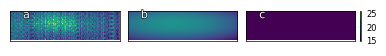

Fig. a: RHEED spot image, b: reconstructed RHEED spot image, c: difference between original and reconstructed image for growth_12 at index 1000.
The Gaussian fitted parameters are: img_sum=62861.00, img_max=26.00, img_mean=19.05,
img_rec_sum=62570.65, img_rec_max=20.62, img_rec_mean=18.96,
height=20.62, x=13.23, y=45.64, width_x=29.37, width_y_max=122.00.


In [20]:
img, img_rec, parameters = processor.visualize(growth='growth_12', spot='spot_1', frame=1000)

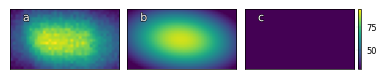

Fig. a: RHEED spot image, b: reconstructed RHEED spot image, c: difference between original and reconstructed image for growth_1 at index 1000.
The Gaussian fitted parameters are: img_sum=52423.00, img_max=94.00, img_mean=59.57,
img_rec_sum=51037.70, img_rec_max=89.54, img_rec_mean=58.00,
height=89.60, x=11.21, y=19.78, width_x=9.67, width_y_max=17.10.


In [21]:
img, img_rec, parameters = processor.visualize(growth='growth_1', spot='spot_2', frame=1000)

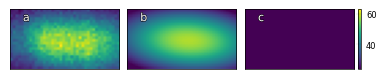

Fig. a: RHEED spot image, b: reconstructed RHEED spot image, c: difference between original and reconstructed image for growth_12 at index 1000.
The Gaussian fitted parameters are: img_sum=38092.00, img_max=63.00, img_mean=43.29,
img_rec_sum=37432.69, img_rec_max=58.39, img_rec_mean=42.54,
height=58.39, x=11.58, y=22.47, width_x=10.38, width_y_max=23.31.


In [22]:
img, img_rec, parameters = processor.visualize(growth='growth_12', spot='spot_2', frame=1000)

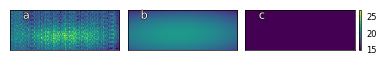

Fig. a: RHEED spot image, b: reconstructed RHEED spot image, c: difference between original and reconstructed image for growth_1 at index 1000.
The Gaussian fitted parameters are: img_sum=87305.00, img_max=27.00, img_mean=19.84,
img_rec_sum=87167.35, img_rec_max=21.47, img_rec_mean=19.81,
height=21.47, x=24.11, y=49.98, width_x=39.04, width_y_max=130.77.


In [23]:
img, img_rec, parameters = processor.visualize(growth='growth_1', spot='spot_3', frame=1000)

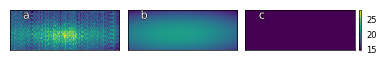

Fig. a: RHEED spot image, b: reconstructed RHEED spot image, c: difference between original and reconstructed image for growth_12 at index 1000.
The Gaussian fitted parameters are: img_sum=88520.00, img_max=28.00, img_mean=20.12,
img_rec_sum=88317.24, img_rec_max=22.32, img_rec_mean=20.07,
height=22.32, x=23.81, y=49.66, width_x=33.31, width_y_max=115.16.


In [24]:
img, img_rec, parameters = processor.visualize(growth='growth_12', spot='spot_3', frame=1000)

#### 2.2.4 Exam the dataset

In [25]:
path = 'D:/STO_STO-Data/RHEED/STO_STO_Berkeley/test7_gaussian_fit_parameters_all-04232023.h5'
D2_para = RHEED_parameter_dataset(path, camera_freq=500, sample_name='treated_81nm')
# D2_para.data_info

../Figures/1.Fit_RHEED_spot/RHEED_treated_81nm_growth_2_spot_2_10000_img,img_rec,differerce.png
../Figures/1.Fit_RHEED_spot/RHEED_treated_81nm_growth_2_spot_2_10000_img,img_rec,differerce.svg


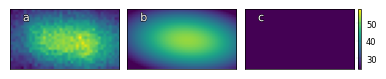

Fig. a: RHEED spot image, b: reconstructed RHEED spot image, c: difference between original and reconstructed image for growth_2 at index 10000.
img_sum=35031.00, img_max=58.00, img_mean=39.81
img_rec_sum=34451.97, img_rec_max=52.63, img_rec_mean=39.15
height=52.64, x=11.50, y=22.16, width_x=11.22, width_y_max=22.80


In [26]:
D2_para.viz_RHEED_parameter(growth='growth_2', spot='spot_2', index=10000, filename=True, printing=printing_image)

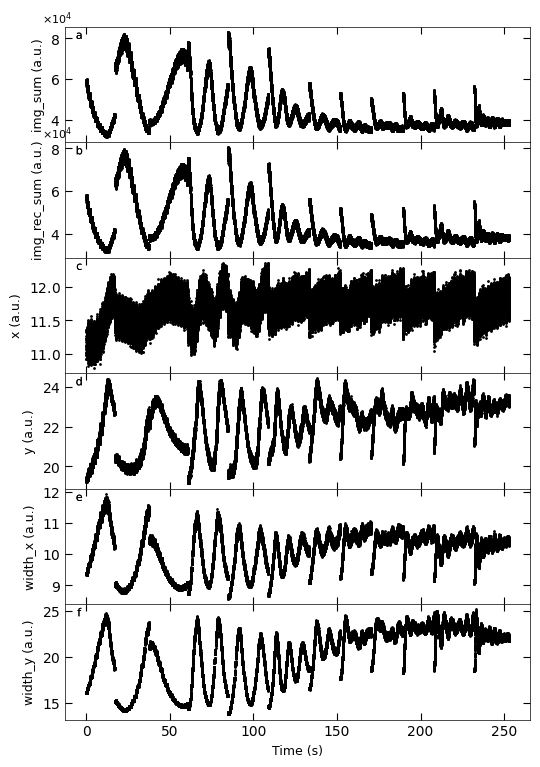

Gaussian fitted parameters in time: Fig. a: maximum intensity of original cropped RHEED spot, b: maximum intensity of resonstructed cropped RHEED spot, c: spot center in spot x coordinate, d: spot center in y coordinate, e: spot width in x coordinate, f: spot width in y coordinate.


In [27]:
growth_list = ['growth_1', 'growth_2', 'growth_3', 'growth_4', 'growth_5', 'growth_6', 'growth_7', 'growth_8', 'growth_9', 'growth_10', 'growth_11', 'growth_12']
D2_para.viz_RHEED_parameter_trend(growth_list, spot='spot_2', metric_list=['img_sum', 'img_rec_sum', 'x', 'y', 'width_x', 'width_y'], )

../Figures/1.Fit_RHEED_spot/RHEED_treated_81nm_spot_2_metrics.png


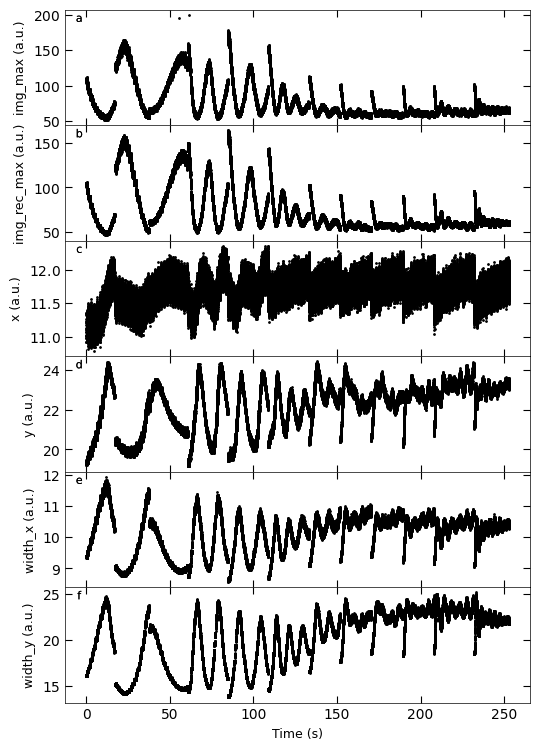

Gaussian fitted parameters in time: Fig. a: maximum intensity of original cropped RHEED spot, b: maximum intensity of resonstructed cropped RHEED spot, c: spot center in spot x coordinate, d: spot center in y coordinate, e: spot width in x coordinate, f: spot width in y coordinate.


In [28]:
growth_list = ['growth_1', 'growth_2', 'growth_3', 'growth_4', 'growth_5', 'growth_6', 'growth_7', 'growth_8', 'growth_9', 'growth_10', 'growth_11', 'growth_12']
D2_para.viz_RHEED_parameter_trend(growth_list, spot='spot_2', filename=True, printing=printing_plot)

### 2.3 Sample untreated_162nm

#### 2.3.1 Loading the Dataset

In [29]:
path = 'D:/STO_STO-Data/RHEED/STO_STO_Berkeley/STO_STO_test9_07142022-standard.h5'
D3_spot = RHEED_spot_Dataset(path, sample_name='untreated_162nm')
# D3_spot.data_info

#### 2.3.2 Locate the diffraction spots

Fig. a: RHEED spot image for growth_2 at index 0.
../Figures/1.Fit_RHEED_spot/RHEED_untreated_162nm_growth_2_0.png
../Figures/1.Fit_RHEED_spot/RHEED_untreated_162nm_growth_2_0.svg


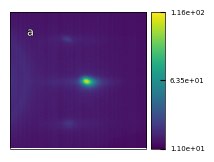

In [30]:
D3_spot.viz_RHEED_spot(growth='growth_2', index=0, figsize=(2,4),  filename=True, printing=printing_image)

#### 2.3.3 Visualize an example

In [31]:
# sets where to crop the image to extact the peaks
crop_dict = {'spot_1': {'y_start':50, 'y_end':72, 'x_start':100, 'x_end':150},
             'spot_2': {'y_start':143, 'y_end':162, 'x_start':150, 'x_end':190},
             'spot_3': {'y_start':218, 'y_end':262, 'x_start':100, 'x_end':165}}
fit_function = Gaussian().recreate_gaussian
processor = RHEED_image_processer(D3_spot, crop_dict, fit_function)

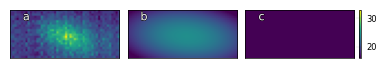

Fig. a: RHEED spot image, b: reconstructed RHEED spot image, c: difference between original and reconstructed image for growth_1 at index 1000.
The Gaussian fitted parameters are: img_sum=23046.00, img_max=33.00, img_mean=20.95,
img_rec_sum=22881.26, img_rec_max=24.39, img_rec_mean=20.80,
height=24.39, x=12.31, y=26.93, width_x=16.87, width_y_max=36.30.


In [32]:
img, img_rec, parameters = processor.visualize(growth='growth_1', spot='spot_1', frame=1000)

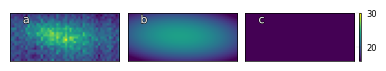

Fig. a: RHEED spot image, b: reconstructed RHEED spot image, c: difference between original and reconstructed image for growth_18 at index 1000.
The Gaussian fitted parameters are: img_sum=22782.00, img_max=30.00, img_mean=20.71,
img_rec_sum=22540.11, img_rec_max=23.95, img_rec_mean=20.49,
height=23.95, x=10.74, y=23.69, width_x=15.40, width_y_max=40.17.


In [33]:
img, img_rec, parameters = processor.visualize(growth='growth_18', spot='spot_1', frame=1000)

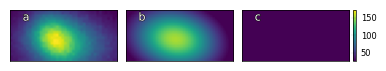

Fig. a: RHEED spot image, b: reconstructed RHEED spot image, c: difference between original and reconstructed image for growth_1 at index 1000.
The Gaussian fitted parameters are: img_sum=58629.00, img_max=172.00, img_mean=77.14,
img_rec_sum=56051.32, img_rec_max=152.96, img_rec_mean=73.75,
height=153.25, x=11.26, y=18.91, width_x=7.66, width_y_max=11.11.


In [34]:
img, img_rec, parameters = processor.visualize(growth='growth_1', spot='spot_2', frame=1000)

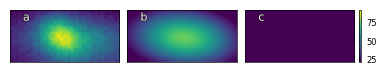

Fig. a: RHEED spot image, b: reconstructed RHEED spot image, c: difference between original and reconstructed image for growth_18 at index 1000.
The Gaussian fitted parameters are: img_sum=35114.00, img_max=92.00, img_mean=46.20,
img_rec_sum=33973.47, img_rec_max=75.65, img_rec_mean=44.70,
height=75.75, x=10.23, y=20.99, width_x=7.94, width_y_max=14.74.


In [35]:
img, img_rec, parameters = processor.visualize(growth='growth_18', spot='spot_2', frame=1000)

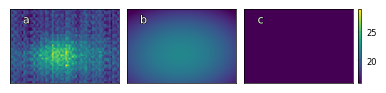

Fig. a: RHEED spot image, b: reconstructed RHEED spot image, c: difference between original and reconstructed image for growth_1 at index 1000.
The Gaussian fitted parameters are: img_sum=56802.00, img_max=29.00, img_mean=19.86,
img_rec_sum=56669.50, img_rec_max=21.97, img_rec_mean=19.81,
height=21.97, x=26.85, y=31.92, width_x=40.82, width_y_max=61.30.


In [36]:
img, img_rec, parameters = processor.visualize(growth='growth_1', spot='spot_3', frame=1000)

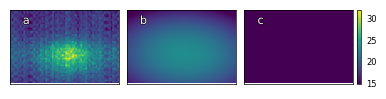

Fig. a: RHEED spot image, b: reconstructed RHEED spot image, c: difference between original and reconstructed image for growth_18 at index 1000.
The Gaussian fitted parameters are: img_sum=57391.00, img_max=32.00, img_mean=20.07,
img_rec_sum=57205.76, img_rec_max=23.31, img_rec_mean=20.00,
height=23.31, x=26.83, y=34.85, width_x=31.40, width_y_max=54.38.


In [37]:
img, img_rec, parameters = processor.visualize(growth='growth_18', spot='spot_3', frame=1000)

#### 2.3.4 Examine the dataset

In [38]:
path = 'D:/STO_STO-Data/RHEED/STO_STO_Berkeley/test9_gaussian_fit_parameters_all-04232023.h5'
D3_para = RHEED_parameter_dataset(path, camera_freq=500, sample_name='untreated_162nm')
D3_para.data_info

Growth: background_with_heater:
--spot: spot_1:
----height:, Size of data: (2023,)
----img_max:, Size of data: (2023,)
----img_mean:, Size of data: (2023,)
----img_rec_max:, Size of data: (2023,)
----img_rec_mean:, Size of data: (2023,)
----img_rec_sum:, Size of data: (2023,)
----img_sum:, Size of data: (2023,)
----raw_image:, Size of data: (2023, 22, 50)
----reconstructed_image:, Size of data: (2023, 22, 50)
----width_x:, Size of data: (2023,)
----width_y:, Size of data: (2023,)
----x:, Size of data: (2023,)
----y:, Size of data: (2023,)
--spot: spot_2:
----height:, Size of data: (2023,)
----img_max:, Size of data: (2023,)
----img_mean:, Size of data: (2023,)
----img_rec_max:, Size of data: (2023,)
----img_rec_mean:, Size of data: (2023,)
----img_rec_sum:, Size of data: (2023,)
----img_sum:, Size of data: (2023,)
----raw_image:, Size of data: (2023, 19, 40)
----reconstructed_image:, Size of data: (2023, 19, 40)
----width_x:, Size of data: (2023,)
----width_y:, Size of data: (2023,)
--

../Figures/1.Fit_RHEED_spot/RHEED_untreated_162nm_growth_2_spot_2_100_img,img_rec,differerce.png
../Figures/1.Fit_RHEED_spot/RHEED_untreated_162nm_growth_2_spot_2_100_img,img_rec,differerce.svg


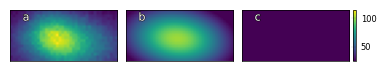

Fig. a: RHEED spot image, b: reconstructed RHEED spot image, c: difference between original and reconstructed image for growth_2 at index 100.
img_sum=45893.00, img_max=114.00, img_mean=60.39
img_rec_sum=44505.52, img_rec_max=101.14, img_rec_mean=58.56
height=101.29, x=10.95, y=19.21, width_x=8.27, width_y_max=13.94


In [39]:
D3_para.viz_RHEED_parameter(growth='growth_2', spot='spot_2', index=100, filename=True, printing=printing_image)

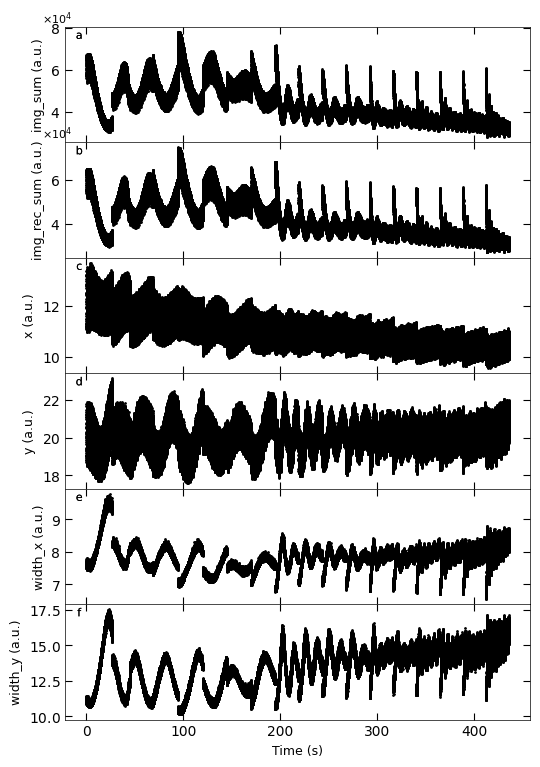

Gaussian fitted parameters in time: Fig. a: maximum intensity of original cropped RHEED spot, b: maximum intensity of resonstructed cropped RHEED spot, c: spot center in spot x coordinate, d: spot center in y coordinate, e: spot width in x coordinate, f: spot width in y coordinate.


In [40]:
growth_list = ['growth_1', 'growth_2', 'growth_3', 'growth_4', 'growth_5', 'growth_6', 'growth_7', 'growth_8', 'growth_9', 
               'growth_10', 'growth_11', 'growth_12' , 'growth_13', 'growth_14', 'growth_15', 'growth_16', 'growth_17', 'growth_18']
D3_para.viz_RHEED_parameter_trend(growth_list, spot='spot_2', metric_list=['img_sum', 'img_rec_sum', 'x', 'y', 'width_x', 'width_y'])

../Figures/1.Fit_RHEED_spot/RHEED_untreated_162nm_spot_2_metrics.png


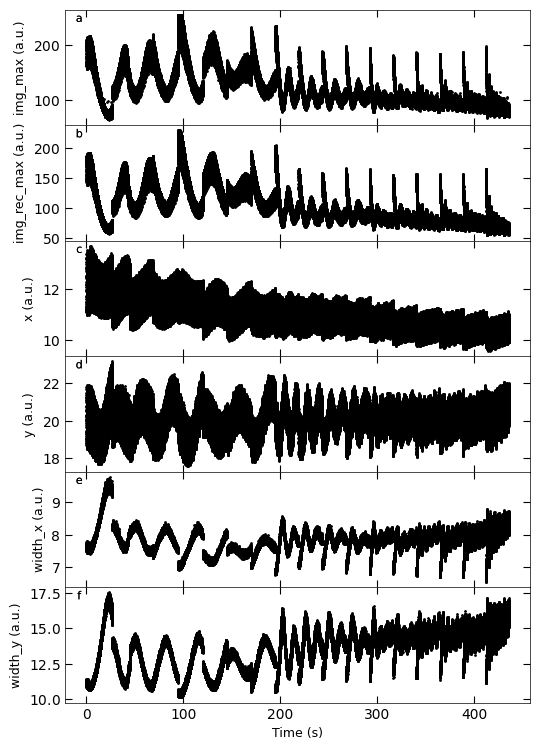

Gaussian fitted parameters in time: Fig. a: maximum intensity of original cropped RHEED spot, b: maximum intensity of resonstructed cropped RHEED spot, c: spot center in spot x coordinate, d: spot center in y coordinate, e: spot width in x coordinate, f: spot width in y coordinate.


In [41]:
growth_list = ['growth_1', 'growth_2', 'growth_3', 'growth_4', 'growth_5', 'growth_6', 'growth_7', 'growth_8', 'growth_9', 
               'growth_10', 'growth_11', 'growth_12' , 'growth_13', 'growth_14', 'growth_15', 'growth_16', 'growth_17', 'growth_18']
D3_para.viz_RHEED_parameter_trend(growth_list, spot='spot_2', filename=True, printing=printing_plot)

### Merged plot for RHEED intensity

In [84]:
x_all_list, y_all_list = [], []

growth_list = ['growth_1', 'growth_2', 'growth_3', 'growth_4', 'growth_5', 'growth_6', 
               'growth_7', 'growth_8', 'growth_9', 'growth_10', 'growth_11', 'growth_12']
x_all, y_all = D1_para.load_multiple_curves(growth_list=growth_list, spot='spot_2', metric='img_rec_sum')
x_all_list.append(x_all)
y_all_list.append(y_all)

growth_list = ['growth_1', 'growth_2', 'growth_3', 'growth_4', 'growth_5', 'growth_6', 'growth_7', 'growth_8', 'growth_9', 'growth_10', 'growth_11', 'growth_12']
x_all, y_all = D2_para.load_multiple_curves(growth_list=growth_list, spot='spot_2', metric='img_rec_sum')
x_all_list.append(x_all)
y_all_list.append(y_all)

growth_list = ['growth_1', 'growth_2', 'growth_3', 'growth_4', 'growth_5', 'growth_6', 'growth_7', 'growth_8', 'growth_9', 
               'growth_10', 'growth_11', 'growth_12' , 'growth_13', 'growth_14', 'growth_15', 'growth_16', 'growth_17', 'growth_18']
x_all, y_all = D3_para.load_multiple_curves(growth_list=growth_list, spot='spot_2', metric='img_rec_sum')
x_all_list.append(x_all)
y_all_list.append(y_all)

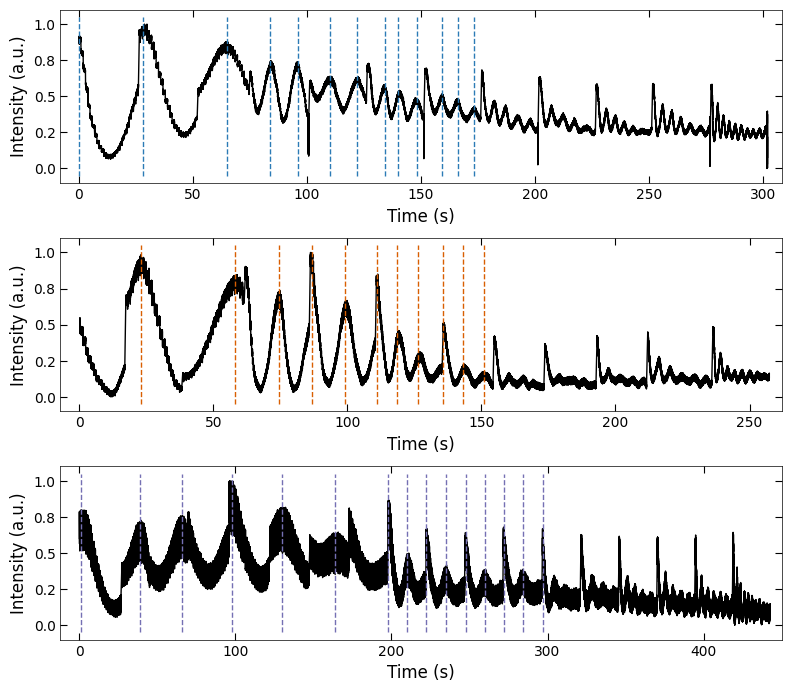

In [85]:
color_blue = (44/255,123/255,182/255)
color_orange = (217/255,95/255,2/255)
color_purple = (117/255,112/255,179/255)
three_colors = [color_blue, color_orange, color_purple]
y_max_list, y_min_list = [], []

dashed_lines_x_1 = [0, 28, 65, 84, 96, 110, 122, 134, 140, 148, 159, 166, 173,
                    # 182, 187, 192, 197, 207.5, 212, 216.5, 222.5, 
                    # 227, 231.5, 235, 238.5, 243, 247, 251.5, 255.5, 259.5, 264, 268, 272, 276,
                    ]
dashed_lines_x_2 = [23, 58, 74.5, 87, 99, 111, 118.5, 126.5, 135.5, 143, 151]
dashed_lines_x_3 = [1, 39, 66, 98, 130, 164, 198, 210, 222, 235, 248, 260, 272, 284, 297]
dashed_lines_x_list = [dashed_lines_x_1, dashed_lines_x_2, dashed_lines_x_3]
xlim_list = [(-8, 308), (-7, 262), (-12, 450)]
fig, axes = layout_fig(graph=3, mod=1, figsize=(8, 7), layout='tight')
for ax, x_all, y_all, color, dashed_lines_x, xlim in zip(axes, x_all_list, y_all_list, three_colors, dashed_lines_x_list, xlim_list):
    
    # normalize the intensity
    y_min_list.append(np.min(y_all))
    y_max_list.append(np.max(y_all))
    y_all = NormalizeData(y_all, lb=np.min(y_all), ub=np.max(y_all))
    
    ax.plot(x_all, y_all, color='black', linewidth=1)
    for x in dashed_lines_x:
        ax.plot([x, x], [np.min(y_all-0.05), np.max(y_all+0.05)], linestyle='--', linewidth=1, color=color)
    ax.set_xlim(xlim)
    ax.set_ylim(-0.1, 1.1)
    Viz.set_labels(ax, xlabel='Time (s)', ylabel='Intensity (a.u.)', yaxis_style='float')

plt.savefig('../Figures/1.Fit_RHEED_spot/summarized_spot_2_sum.png', dpi=600, bbox_inches='tight', transparent=True)
plt.show()

In [86]:
x_all_list, y_all_list = [], []

growth_list = ['growth_1', 'growth_2', 'growth_3']
x_all, y_all = D1_para.load_multiple_curves(growth_list=growth_list, spot='spot_2', metric='img_rec_sum')
y_all = y_all[(x_all>28) & (x_all<65)]
x_all = x_all[(x_all>28) & (x_all<65)]
x_all_list.append(x_all) 
y_all_list.append(y_all)

growth_list = ['growth_1', 'growth_2', 'growth_3']
x_all, y_all = D2_para.load_multiple_curves(growth_list=growth_list, spot='spot_2', metric='img_rec_sum')
y_all = y_all[(x_all>23) & (x_all<60)]
x_all = x_all[(x_all>23) & (x_all<60)]
x_all_list.append(x_all)
y_all_list.append(y_all)

growth_list = ['growth_1', 'growth_2']
x_all, y_all = D3_para.load_multiple_curves(growth_list=growth_list, spot='spot_2', metric='img_rec_sum')
y_all = y_all[(x_all>1) & (x_all<39)]
x_all = x_all[(x_all>1) & (x_all<39)]
x_all_list.append(x_all)
y_all_list.append(y_all)

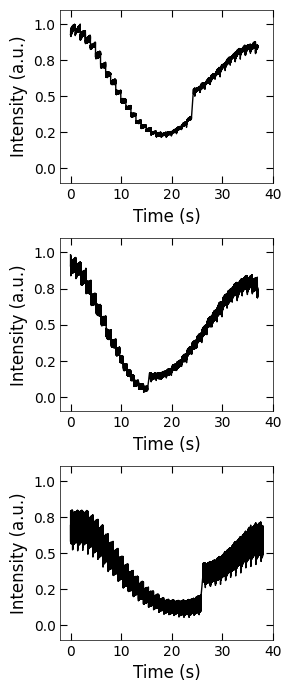

In [87]:
fig, axes = layout_fig(graph=3, mod=1, figsize=(3, 7), layout='tight')
for ax, x_all, y_all, y_min, y_max, color, dashed_lines_x in zip(axes, x_all_list, y_all_list, y_min_list, y_max_list, three_colors, dashed_lines_x_list):
    x_all = x_all - x_all[0]
    y_all = NormalizeData(y_all, lb=y_min, ub=y_max)
    
    ax.plot(x_all, y_all, color='black', linewidth=1)
    ax.set_xlim(-2, 40)
    ax.set_ylim(-0.1, 1.1)
    
    Viz.set_labels(ax, xlabel='Time (s)', ylabel='Intensity (a.u.)', yaxis_style='float')
plt.savefig('../Figures/1.Fit_RHEED_spot/summarized_single_unit_cell_growth.png', dpi=600, bbox_inches='tight', transparent=True)
plt.show()